# Worked Problem Assignment 6

### <p style="text-align: right;">  Kyle Taft

# Background

In class we have learned about the Fourier transform and the mathematical backings that we have put into code to be able to use it to calculate the Fourier coefficients. Specifically we developed the technique of a Fast Fourier transform (FFT) to approach as a numerical method. Here I used the interesting situation of audio waveforms, specically the sound of a C major chord (with a C on top) added together to create a single waveform. This is a very interesting situation because our ears hear this as a single "note", but in reality it is a combination of multiple frequencies of notes. I break the signal back into its consituant notes to show the power of the Fourier transform.

**NOTE: Commenting out any code using sounddevice will still allow the code to run, but will not play the audio.**

# Generating the Signal
Below I generate the signal using the code from the class notes. I used the frequencies of the notes in the C major chord (C, E, G, C) and added them together to create a single waveform. I play the waveform through sounddevice package. I then plot the waveform to show what it looks like summed and individually.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd # for playing our waveform

In [4]:
# Generate our audio waveform
frequencies = np.array([261.6, 329.6, 392.0, 523.2])  # Hz (C4, E4, G4, C5)
duration = 2 # how many seconds we sample for
sampling_rate = 10000  # How many times per second we sample the wave
wave = np.zeros(int(sampling_rate * duration))
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
for freq in frequencies: # add each frequency to the waveform
    wave += 0.25 * np.sin(2 * np.pi * freq * t)

# Play the generated waveform
sd.play(wave, sampling_rate)
sd.wait()


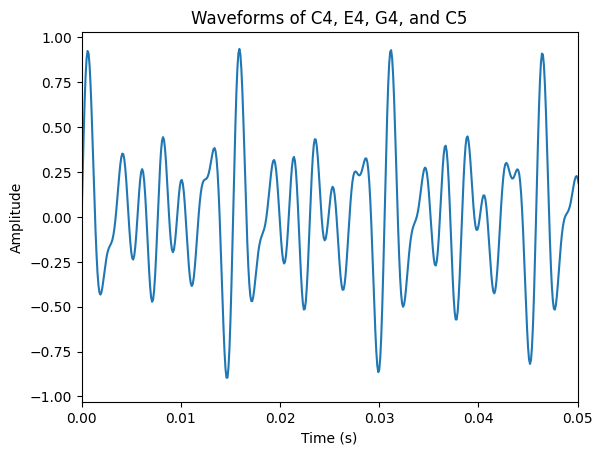

In [3]:
# Plot the summed waveform
plt.plot(t, wave)
plt.xlim(0, .05)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveforms of C4, E4, G4, and C5');

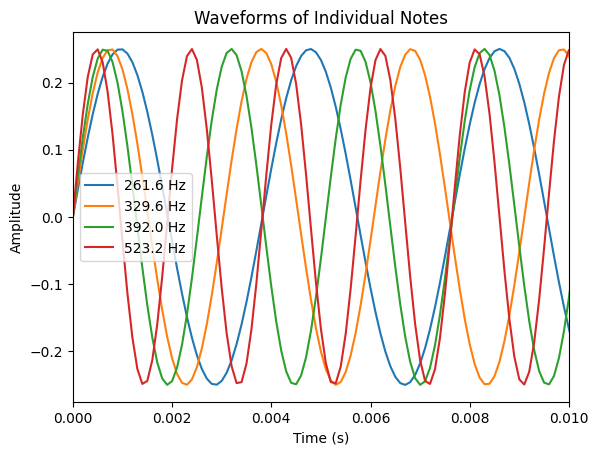

In [4]:
# Plot the individual waveforms
for freq in frequencies:
    single_wave = 0.25 * np.sin(2 * np.pi * freq * t)
    plt.plot(t, single_wave, label=f'{freq} Hz')
plt.xlim(0, .01)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveforms of Individual Notes');
plt.legend();

# Calculating the Fourier Coefficients

Here I follow the procedure that we set up in class to calculate the Fourier coefficients. I use the same code as in class to calculate the coefficients and then plot the magnitude of the coefficients. I then plot the magnitude of the coefficients to reveal our original frequencies.

In [5]:
# Compute the Fourier coefficient
def compute_cn(v, n, T, f0):
    omega = 2 * np.pi * f0 # angular frequency
    x = np.linspace(0, T, len(v))
    cn = 1/T * np.trapz(v * np.exp(-1j * n * omega * x), x, 0.01) # integrate using trapezoidal rule
    return cn

# Fourier series expansion using complex form
def fs_expansion(v, t, T, N):
    f0 = 1 / T 
    series = np.zeros_like(t, dtype=complex)
    cns = np.zeros(2*N+1, dtype=complex)
    for n in range(-N, N+1, 1): # sum over all n
        series += compute_cn(v, n, T, f0) * np.exp(1j * n * 2 * np.pi * f0 * t) # compute Fourier series
        cns[n+N] = compute_cn(v, n, T, f0) # store Fourier coefficients
    return series.real, cns


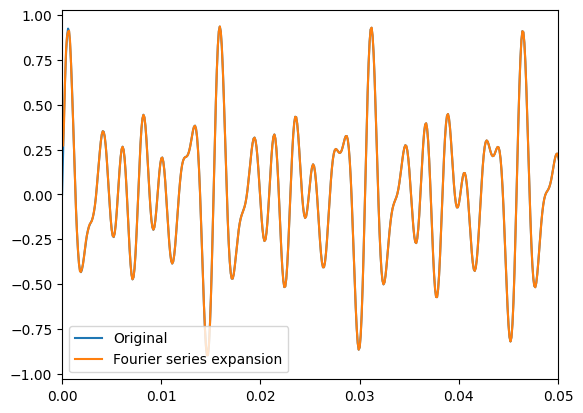

In [6]:
# Calculate the Fourier series expansion
N = 5000 # number of terms to sum (we need a lot to get a good approximation here)
plt.plot(t, wave, label='Original') # plot the original waveform
series, cns = fs_expansion(wave, t, duration, N) # compute the Fourier series expansion
plt.plot(t, series , label='Fourier series expansion') # plot the Fourier series expansion
plt.xlim(0, .05)
plt.legend()

# Results

Here we see the Fourier coefficients that we have calculted plotted against their magnitude. We see the result we would have hoped to have gotten, the frequencies of the notes in the C major chord. We see the C, E, G, and C notes all represented in the coefficients and noted by their red dashed line. This is a very interesting result because we see that the Fourier transform is able to break down the signal into its consituant frequencies. This is a very powerful tool that we can use to analyze signals and understand what is going on in them.

Additionally, I plot below the individual signals we calculate (red) vs the original ones we had (black). We see complete overlap.

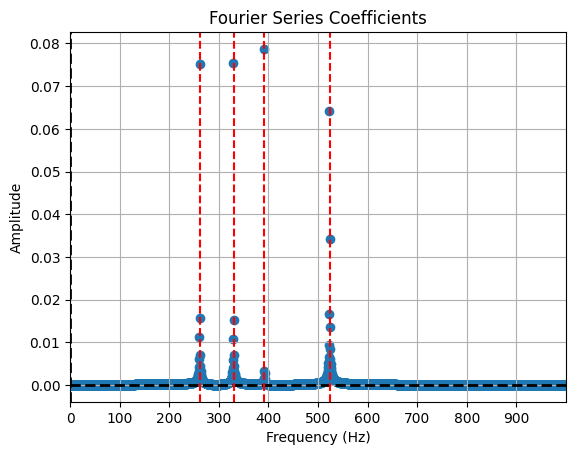

In [7]:
# Plot the Fourier series coefficients
freqs_array = np.arange(-N, N+1, 1) / duration
x = freqs_array[N+1:] # positive frequencies
y = 2*np.abs(cns[N+1:]) # positive Fourier coefficients * 2

plt.scatter(x, y/np.sum(y)) # plot the positive Fourier coefficients

plt.title('Fourier Series Coefficients')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# X and Y axes
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)

# Plot the frequencies of the original notes
for freq in frequencies:
    plt.axvline(x=freq, color='r', linestyle='--')

plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000, 100))
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


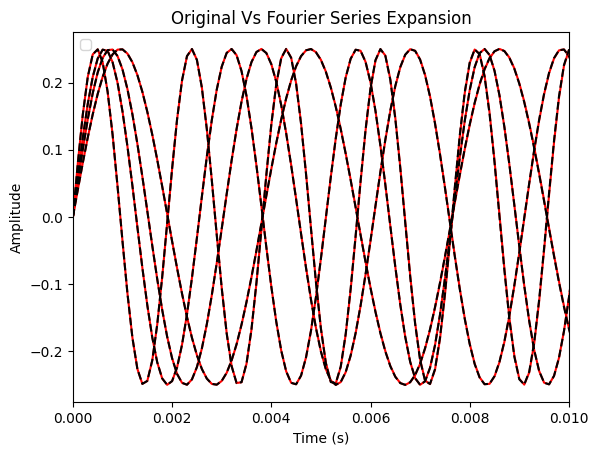

In [8]:
# Plot the Fourier series expansion
for freq in x[y/np.sum(y)>0.05]: # plot the frequencies with amplitude > 0.05
    single_wave = 0.25 * np.sin(2 * np.pi * freq * t)
    plt.plot(t, single_wave, color='r')

for freq in frequencies: # plot the original notes
    single_wave = 0.25 * np.sin(2 * np.pi * freq * t)
    plt.plot(t, single_wave, color='k', linestyle='--')
plt.xlim(0, .01)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Vs Fourier Series Expansion');
plt.legend();

# Extra: Square Wave

Here I do the exact same analysis as above but with a square wave of audio instead of a perfect sine wave. This is of interested to me because I know the Fourier transform is built off of sinusoidal waves, so I am interested to see the result when the audio is not perfectly sinusoidal.

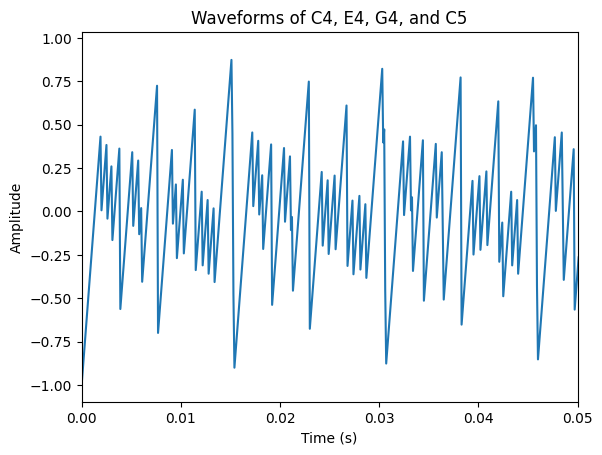

In [8]:
from scipy.signal import square
from scipy.signal import sawtooth

# Generate our audio waveform
frequencies = np.array([261.6, 329.6, 392.0, 523.2])  # Hz (C4, E4, G4, C5)
duration = 2 # how many seconds we sample for
sampling_rate = 10000  # How many times per second we sample the wave
wave = np.zeros(int(sampling_rate * duration))
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
for freq in frequencies: # add each frequency to the waveform
    wave += 0.25 * square(2 * np.pi * freq * t)
    # wave += 0.25 * sawtooth(2 * np.pi * freq * t)

# Play the generated waveform
sd.play(wave, sampling_rate)
sd.wait()

# Plot the summed waveform
plt.plot(t, wave)
plt.xlim(0, .05)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveforms of C4, E4, G4, and C5');

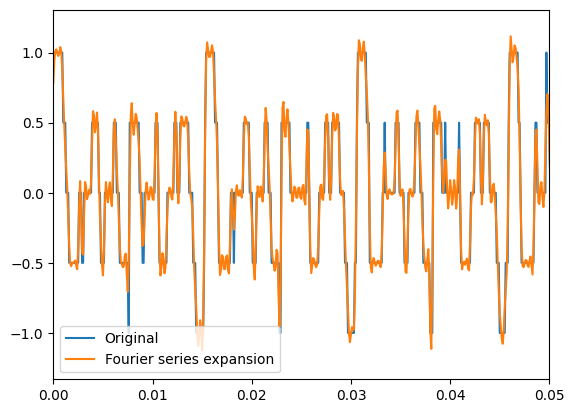

In [10]:
# Calculate the Fourier series expansion
N = 5000 # number of terms to sum (we need a lot to get a good approximation here)
plt.plot(t, wave, label='Original') # plot the original waveform
series, cns = fs_expansion(wave, t, duration, N) # compute the Fourier series expansion
plt.plot(t, series , label='Fourier series expansion') # plot the Fourier series expansion
plt.xlim(0, .05)
plt.legend()

# Results

The results are very interesting. I did not first except for us to get coefficents in the same spots as the sine wave frequencies but now thinking on it more it makes sense. The major part of breaking down the square waave is likely the original sine waves we were working with before. Additionally, we see that the coefficients are not as clean as the sine wave coefficients. This is likely due to the fact that the square wave is not that perfect sine wave so it is harder for the FFT to break it up.

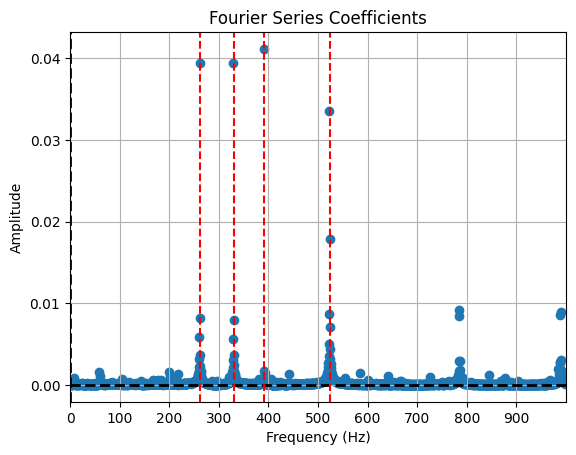

In [11]:
# Plot the Fourier series coefficients
freqs_array = np.arange(-N, N+1, 1) / duration
x = freqs_array[N+1:] # positive frequencies
y = 2*np.abs(cns[N+1:]) # positive Fourier coefficients * 2

plt.scatter(x, y/np.sum(y)) # plot the positive Fourier coefficients

plt.title('Fourier Series Coefficients')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# X and Y axes
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)

# Plot the frequencies of the original notes
for freq in frequencies:
    plt.axvline(x=freq, color='r', linestyle='--')

plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000, 100))
plt.grid()